In [5]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport

In [6]:
#loading the dataset
df = pd.read_csv(r"C:\Projects\food-delivery-regression\data\raw\Food_Delivery_Time_Prediction.csv")

In [7]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [8]:
#   Initial inspection of the dataset confirms correct ingestion with semantically valid values across numerical and categorical features. No 
#   structural anomalies such as column shifts or malformed entries are observed. Location features are stored as raw latitude–longitude tuples and 
#   will require feature engineering prior to modeling. The target variable exhibits realistic delivery time ranges, supporting downstream regression 
#   and classification tasks

In [9]:
df.tail()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25
199,ORD0200,"(19.360304, 84.132424)","(20.941636, 77.01334)",9.18,Snowy,Low,2,Low,Morning,Bike,4.6,3.2,78.58,323.73,48.91


In [10]:
#   Inspection of terminal rows confirms consistent schema, value ranges, and indexing across the dataset, suggesting stable ingestion without 
#   truncation or corruption.

In [11]:
df.sample(5, random_state=42)

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
95,ORD0096,"(19.486415, 78.557736)","(16.8342, 83.728159)",22.15,Sunny,Low,1,High,Night,Car,3.8,4.6,91.22,1557.05,39.75
15,ORD0016,"(14.62525, 78.17385)","(12.069338, 80.962928)",20.73,Snowy,Medium,7,High,Morning,Car,3.7,3.4,50.11,972.65,46.41
30,ORD0031,"(17.012613, 78.845912)","(14.558344, 77.803961)",24.10,Sunny,High,5,High,Morning,Bicycle,2.5,2.6,87.96,1528.96,54.55
158,ORD0159,"(19.537173, 87.663414)","(15.946469, 85.2729)",14.12,Snowy,High,8,Low,Afternoon,Bike,4.5,4.2,95.64,1904.56,8.01
128,ORD0129,"(18.315683, 82.648086)","(15.079457, 80.472343)",18.07,Sunny,Medium,1,High,Morning,Car,4.9,3.4,16.98,1168.58,57.56


In [12]:
len(df)

200

In [13]:
df.shape

(200, 15)

In [14]:
#  Dataset Size Validation
#  The dataset consists of 200 observations and 15 features, confirming successful ingestion without row loss. Given the moderate dimensionality and
#  limited sample size, the analysis will prioritize interpretability, robust validation, and feature-driven modeling to mitigate overfitting risks.

In [15]:
df.size

3000

In [16]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [17]:
#   Delivery distance spans a wide operational range, indicating heterogeneous delivery scenarios rather than localized routing.

In [18]:
#   Experience appears ordinal rather than continuous, suggesting ordered skill levels rather than granular measurement.

In [19]:
#   Ratings are tightly bounded with low variance, indicating limited standalone predictive power.

In [20]:
#   Delivery time shows high variance, implying significant influence from latent operational factors.

In [21]:
#   Monetary features exhibit natural right skew and require normalization to avoid dominance in optimization.

In [22]:
#   Tip amount reflects discretionary human behavior and may introduce noise rather than signal.

In [23]:
#   Delivery time exhibits high variance with a broad interquartile range, indicating substantial heterogeneity likely driven by contextual factors 
#   such as traffic and distance.

In [24]:
df.describe(include = 'object')

,Order_ID,Customer_Location,Restaurant_Location,Weather_Conditions,Traffic_Conditions,Order_Priority,Order_Time,Vehicle_Type
count,200,200,200,200,200,200,200,200
unique,200,200,200,4,3,3,4,3
top,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",Rainy,Low,Low,Afternoon,Bike
freq,1,1,1,57,81,75,59,69


In [25]:
#   Order_ID is a pure identifier with no predictive value.

In [26]:
#   Raw coordinates are high-cardinality features unsuitable for direct encoding.

In [27]:
#   Weather conditions is a low-cardinality nominal variable suitable for one-hot encoding.

In [28]:
#   Traffic is ordinal and should preserve ordering during encoding.

In [29]:
#   Time-of-day captures latent traffic and demand cycles.

In [30]:
#   Vehicle type impacts speed constraints and route flexibility.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [32]:
#   The dataset consists of 200 observations across 15 features, indicating suitability for classical statistical and linear models while limiting 
#   the feasibility of high-capacity or data-hungry approaches.

In [33]:
#   All features are fully populated with no missing values, eliminating the need for imputation and reducing the risk of bias introduced by 
#   missing-data mechanisms.

In [34]:
#   Several object-typed features represent heterogeneous semantic types, including identifiers, geospatial attributes, ordinal categories, and 
#   cyclical variables, necessitating differentiated preprocessing strategies rather than uniform encoding.

In [35]:
#   Numerical features exhibit heterogeneous scales and distributions, indicating the need for scaling and outlier analysis prior to linear modeling,
#   particularly given the presence of bounded and ordinal numeric variables.

In [36]:
#   Low memory footprint confirms compact dataset representation with no evidence of structural redundancy.

In [37]:
df.dtypes

Order_ID                       object
Customer_Location              object
Restaurant_Location            object
Distance                      float64
Weather_Conditions             object
Traffic_Conditions             object
Delivery_Person_Experience      int64
Order_Priority                 object
Order_Time                     object
Vehicle_Type                   object
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
dtype: object

In [38]:
#   The dataset is structurally clean, semantically interpretable, and requires standard—but non-trivial—feature engineering rather than heavy 
#   data cleaning.
#   The dataset contains a healthy mix of categorical and numerical features, making it suitable for both linear regression and classification models,
#   provided proper encoding and scaling are applied.

In [39]:
#   Order_ID is a pure identifier with no predictive signal and should be excluded from modeling to avoid memorization effects.

In [40]:
#   Location features are stored as raw coordinate tuples, which are not directly model-consumable. These should be transformed into distance-based 
#   or geospatial features.

In [41]:
#   Distance is a continuous numeric feature with strong expected correlation to delivery time and should be scaled and checked for outliers.

In [42]:
#   Low-cardinality nominal categorical features (Weather_Conditions, Traffic_Conditions, Vehicle_Type) are suitable for one-hot encoding with 
#   minimal risk of dimensionality explosion.

In [43]:
#   Delivery_Person_Experience is a discrete ordinal numeric feature and can be used directly, though scaling may improve model convergence.

In [44]:
#   Order_Priority is an ordinal categorical feature with inherent ranking and should be encoded using an ordinal mapping rather than one-hot encoding.

In [45]:
#   Order_Time represents an ordinal temporal abstraction and should be ordinally encoded to preserve inherent ordering.

In [46]:
#   Ratings are bounded continuous features with limited variance and should be treated cautiously, as their predictive power may saturate.

In [47]:
#   The target variable is continuous, well-bounded, and free from missing or invalid values, making it suitable for regression modeling without 
#   label cleaning.

In [48]:
#   Monetary features typically exhibit right-skew and should be analyzed for distributional imbalance and potential transformation.

In [49]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [50]:
#   This dataset is schema-clean, semantically rich, and structured in a way that supports modular feature engineering without schema refactoring.

In [51]:
df.columns.tolist()

['Order_ID',
 'Customer_Location',
 'Restaurant_Location',
 'Distance',
 'Weather_Conditions',
 'Traffic_Conditions',
 'Delivery_Person_Experience',
 'Order_Priority',
 'Order_Time',
 'Vehicle_Type',
 'Restaurant_Rating',
 'Customer_Rating',
 'Delivery_Time',
 'Order_Cost',
 'Tip_Amount']

In [52]:
#   Explicit column lists enable deterministic preprocessing and reduce hidden coupling between data and code.

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.nunique()

Order_ID                      200
Customer_Location             200
Restaurant_Location           200
Distance                      191
Weather_Conditions              4
Traffic_Conditions              3
Delivery_Person_Experience     10
Order_Priority                  3
Order_Time                      4
Vehicle_Type                    3
Restaurant_Rating              26
Customer_Rating                25
Delivery_Time                 199
Order_Cost                    199
Tip_Amount                    198
dtype: int64

In [55]:
#   Order_ID is a pure identifier with full cardinality and carries no predictive signal. It should be excluded from modeling to avoid noise and 
#   accidental leakage.
df.drop(columns = ['Order_ID'], inplace= True)

In [56]:
#   Raw location features are high-cardinality identifiers in their current form and unsuitable for direct encoding. Spatial relationships must 
#   be extracted via distance-based or clustering features.

In [57]:
#   Distance behaves as a continuous feature with sufficient resolution. Scaling and outlier analysis are required prior to linear modeling.

In [58]:
#   Weather is a low-cardinality nominal variable suitable for one-hot encoding with minimal dimensional expansion.

In [59]:
#   Traffic conditions exhibit ordinal structure and should preserve ordering during encoding to retain monotonic relationships with delivery time.

In [60]:
#   Experience is a bounded numerical feature that can be treated as ordinal or continuous, but scaling is required for linear models.

In [61]:
#   Order priority is an ordinal categorical feature that should preserve ranking during encoding.

In [62]:
#   Order time is cyclical and categorical; naïve ordinal encoding may introduce artificial distances. One-hot encoding or time-aware transformation 
#   should be considered.

In [63]:
#   Vehicle type is nominal with low cardinality and safe for one-hot encoding.

In [64]:
#   Ratings are quasi-continuous variables. They should be treated as numeric but analyzed for noise, discretization artifacts, and correlation 
#   strength.

In [65]:
#   The target variable is continuous with high resolution, making it well-suited for regression modeling.

In [66]:
#   Cost-related features exhibit wide numeric ranges and are prone to skewness. Log transformation and scaling should be evaluated.

In [67]:
#checking for missing values
df.isna().sum()

Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [68]:
#   The dataset exhibits complete feature coverage with no missing values, simplifying preprocessing and reducing the risk of bias introduced by 
#   imputation strategies.

<Axes: >

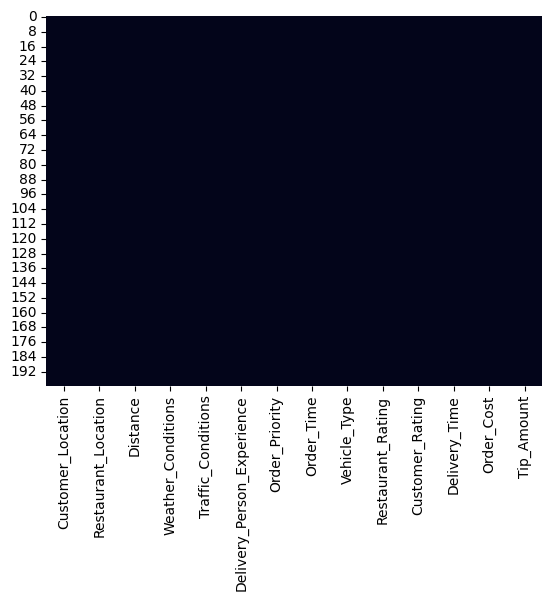

In [69]:
sns.heatmap(df.isna(), cbar=False)

In [70]:
#   Visual inspection confirms the absence of structured or systematic missingness across features, supporting the assumption of uniform data
#   completeness.

In [71]:
df.skew(numeric_only=True)

Distance                      0.291117
Delivery_Person_Experience   -0.005337
Restaurant_Rating            -0.051046
Customer_Rating               0.076094
Delivery_Time                -0.180984
Order_Cost                   -0.023487
Tip_Amount                    0.084603
dtype: float64

In [72]:
#   Given the absence of significant skewness, standard scaling is sufficient without the need for distributional transformations.

In [73]:
#   Distance exhibits mild positive skew consistent with real-world spatial distributions, not warranting transformation.

In [74]:
#   Delivery personnel experience is evenly distributed across levels, reducing concerns around dominance of extreme experience values.

In [75]:
#   Rating features show stable distributions within bounded ranges, indicating consistent feedback patterns and low variance risk.

In [76]:
#   Delivery time distribution is approximately symmetric with minor left skew, suggesting operational consistency without heavy tail risk.

In [77]:
#   Financial features demonstrate unexpectedly low skewness, suggesting either controlled pricing mechanisms or synthetic data generation.

In [78]:
df['Delivery_Time'].isna().sum()

np.int64(0)

In [79]:
df['Delivery_Time'].value_counts()

Delivery_Time
66.84     2
62.61     1
26.22     1
111.63    1
32.38     1
         ..
50.39     1
90.54     1
73.20     1
53.94     1
78.58     1
Name: count, Length: 199, dtype: int64

In [80]:
df['Delivery_Time'].describe()

count    200.000000
mean      70.494950
std       29.830694
min       15.230000
25%       46.997500
50%       72.775000
75%       96.650000
max      119.670000
Name: Delivery_Time, dtype: float64

In [81]:
#   The delivery time target spans a realistic operational range (15–120 minutes), with no implausible values such as zeros or negatives, indicating
#   a clean and physically valid supervision signal.

In [82]:
#   The mean (70.5) and median (72.8) are closely aligned, suggesting an approximately symmetric distribution without strong skew.

In [83]:
#   The relatively high standard deviation (~30 minutes) indicates substantial variability in delivery times, implying the presence of multiple 
#   interacting drivers rather than a near-deterministic process.

In [84]:
#   The interquartile range (≈ 50 minutes) shows that the middle 50% of deliveries exhibit wide dispersion, reinforcing the need for multivariate 
#   modeling rather than univariate rules.

In [85]:
#   No extreme outliers are observed beyond plausible operational limits, suggesting that outlier handling or target clipping is unnecessary at this 
#   stage.

In [86]:
#   Overall, the delivery time target is well-formed, continuous, and approximately symmetric, with sufficient variance to support predictive
#   modeling and no immediate need for transformation or filtering.

In [87]:
(df['Delivery_Time'] == 0).sum()

np.int64(0)

In [88]:
(df['Distance'] < 0).sum()

np.int64(0)

In [89]:
#   Distance contains no negative values, confirming adherence to real-world constraints.

In [90]:
df.sort_values('Delivery_Time').head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
82,"(21.047258, 87.456557)","(15.704977, 78.651575)",9.59,Rainy,High,3,High,Night,Bicycle,4.9,4.2,15.23,240.39,83.16
56,"(12.151614, 83.536485)","(21.417753, 78.073953)",19.52,Snowy,High,7,Low,Morning,Bike,3.0,3.6,15.42,1736.73,27.46
80,"(13.362809, 81.139969)","(18.988702, 85.352561)",0.56,Sunny,Medium,2,Low,Night,Bike,4.1,4.9,16.48,1624.41,43.14
128,"(18.315683, 82.648086)","(15.079457, 80.472343)",18.07,Sunny,Medium,1,High,Morning,Car,4.9,3.4,16.98,1168.58,57.56
16,"(21.621044, 83.330567)","(12.736908, 77.460086)",14.02,Rainy,High,1,Medium,Morning,Bike,4.4,4.2,17.53,494.63,23.50


In [91]:
#   The minimum delivery times fall within realistic operational bounds, suggesting no data corruption or target leakage.

In [92]:
#   Distance alone does not explain minimum delivery times, indicating strong interaction effects with other features such as traffic, time of day,
#   or rider experience.

In [93]:
#   Fastest deliveries cluster in low-congestion time windows, suggesting temporal effects play a significant role in delivery efficiency.

In [94]:
#   High traffic does not uniformly imply longer delivery times, suggesting traffic labels may be coarse-grained or mitigated by rider experience, 
#   routing, or vehicle choice.

In [95]:
#   Two-wheelers appear overrepresented among the fastest deliveries, indicating vehicle type likely moderates delivery speed, especially in congested 
#   or short-distance scenarios.

In [96]:
#   High delivery performance is not exclusively associated with experienced riders, suggesting route simplicity or contextual factors may dominate 
#   over rider skill in certain cases.

In [97]:
#   Customer and restaurant ratings do not appear to constrain minimum delivery times, indicating ratings may reflect service quality rather than 
#   delivery efficiency.

In [98]:
#   Order value and tip size show high variance among fast deliveries, suggesting financial incentives are not primary drivers of delivery speed.

In [99]:
#   Inspection of the fastest deliveries indicates that minimum delivery times fall within realistic operational bounds, reinforcing target 
#   reliability. While short distances contribute to rapid delivery, several long-distance orders also achieve low delivery times, highlighting 
#   strong interaction effects with temporal and contextual variables. Fast deliveries cluster during low-congestion periods (morning and night), 
#   and two-wheelers appear disproportionately represented. Interestingly, rider experience and financial incentives do not consistently explain 
#   optimal performance, suggesting environmental and logistical factors dominate under favorable conditions

In [100]:
df.sort_values('Delivery_Time', ascending=False).head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
106,"(19.001364, 82.216913)","(19.34114, 85.781167)",21.76,Sunny,Low,8,High,Afternoon,Bicycle,3.2,2.6,119.67,765.50,72.11
194,"(13.634688, 81.317357)","(19.198154, 79.886316)",18.20,Rainy,High,4,Medium,Morning,Car,4.8,3.3,119.46,975.58,69.67
84,"(20.647159, 78.225933)","(13.209912, 82.039972)",9.17,Rainy,Low,5,High,Evening,Bicycle,5.0,3.1,118.80,236.86,7.41
86,"(12.396437, 78.148824)","(12.352906, 85.095338)",12.73,Cloudy,Medium,1,Medium,Night,Bike,2.5,3.8,118.26,713.21,2.96
141,"(13.140203, 84.190237)","(16.521642, 87.436243)",12.97,Rainy,High,5,Low,Morning,Bike,4.0,4.4,116.43,554.58,1.29


In [ ]:
#   Distance is a contributor, not a sufficient condition. The relationship between distance and delivery time is non-linear and context-dependent.

In [ ]:
#   Traffic alone cannot explain delays. There are latent variables or interactions not explicitly captured.

In [ ]:
#   Vehicle type introduces speed constraints and may amplify distance and weather effects.

In [ ]:
#   Experience has diminishing returns when external constraints dominate (distance, weather, vehicle)

In [ ]:
#   Priority is an intended control variable, not a guaranteed outcome variable.

In [ ]:
#   Ratings are noisy, lagging indicators and should not be assumed causal.

In [102]:
#   The longest delivery times are not explained by distance or traffic alone. Delays persist even under low traffic and high rider experience, 
#   indicating strong interaction effects between vehicle type, distance, and environmental conditions. Bicycle-based deliveries appear 
#   disproportionately represented among extreme delays, suggesting vehicle constraints amplify other factors. Order priority and ratings show weak 
#   direct alignment with delivery outcomes, reinforcing the need for multivariate modeling rather than heuristic rules.

In [115]:
df.groupby('Vehicle_Type')['Delivery_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle_Type,,,,,,,,
Bicycle,69.0,74.315942,29.839355,15.23,56.7800,74.95,98.890,119.67
Bike,69.0,66.728696,31.007948,15.42,39.7000,69.67,93.200,118.26
Car,62.0,70.434032,28.391290,16.98,49.6825,71.21,93.755,119.46


In [ ]:
#   Vehicle_Type clearly matters. Unlike Order_Priority, this is not noise. (mean)

In [ ]:
#   Means and medians align → distributions are stable. The effect is systematic, not driven by extreme cases.

In [ ]:
#   25th percentile (best-case deliveries).

In [ ]:
#   75th percentile (bad but common cases): Bike ≈ Car, bicycle degrades faster

In [ ]:
#   Tail risk (worst-case delivery): No vehicle type protects against catastrophic delays.

In [ ]:
#   std: Bikes are fast but inconsistent, cars are slower than bikes but more predictable, bicycles are slow and inconsistent.

In [107]:
df.groupby('Traffic_Conditions')['Distance'].describe()

,count,mean,std,min,25%,50%,75%,max
Traffic_Conditions,,,,,,,,
High,51.0,12.972941,7.161951,0.52,7.5050,12.20,18.76,24.45
Low,81.0,10.621358,7.010782,1.19,4.8700,9.17,16.03,23.94
Medium,68.0,11.436176,6.282996,0.56,7.7475,11.25,15.99,24.90


In [ ]:
#   Delivery time is not governed by traffic or distance alone. It is governed by how the system reacts to perceived urgency.

In [106]:
df.groupby('Order_Priority')['Delivery_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Order_Priority,,,,,,,,
High,58.0,70.718621,31.502309,15.23,42.315,72.445,99.860,119.67
Low,75.0,70.988533,28.037606,15.42,48.395,73.820,94.035,116.43
Medium,67.0,69.748806,30.720449,17.53,48.245,71.810,97.055,119.46


In [ ]:
#   Order priority has negligible impact on average delivery time.

In [ ]:
#   Priority is not a controlling variable, it’s decorative. (std)

In [ ]:
#   Priority does not shift the center of the distribution. (median)

In [ ]:
#   Even high-priority orders can fail catastrophically.

In [ ]:
#   Priority might be a proxy for complexity, not urgency. High-priority orders actually have slightly worse upper-tail behavior.

In [ ]:
#   CORE INSIGHT: Order_Priority is NOT a strong predictor of Delivery_Time. 

In [ ]:
#   BUSINESS INSIGHT: Customers paying for priority are not receiving faster delivery on average.

In [109]:
df.groupby(['Traffic_Conditions', 'Order_Priority'])['Delivery_Time'].mean()

Traffic_Conditions  Order_Priority
High                High              74.324444
                    Low               65.095652
                    Medium            67.358421
Low                 High              71.789286
                    Low               77.667692
                    Medium            66.542593
Medium              High              67.745714
                    Low               69.522308
                    Medium            76.033810
Name: Delivery_Time, dtype: float64

In [ ]:
#   Delivery time is governed by operational response, not physical constraints.
#   Traffic and priority act as signals that trigger different system behaviors, often overriding distance effects.

In [110]:
df.groupby(['Traffic_Conditions', 'Order_Priority', 'Vehicle_Type'])['Delivery_Time'].mean()

Traffic_Conditions  Order_Priority  Vehicle_Type
High                High            Bicycle         69.502000
                                    Bike            68.485000
                                    Car             92.220000
                    Low             Bicycle         70.876667
                                    Bike            58.660000
                                    Car             71.113333
                    Medium          Bicycle         78.500000
                                    Bike            46.798333
                                    Car             74.204000
Low                 High            Bicycle         78.380000
                                    Bike            68.495000
                                    Car             64.465556
                    Low             Bicycle         81.942000
                                    Bike            80.858182
                                    Car             62.100000
                    M

In [ ]:
#   Vehicle_Type dominates Priority in many cases.

In [ ]:
#   Delivery time is not driven by Priority or Traffic alone, but by how Vehicle_Type is conditionally assigned under those contexts.

In [ ]:
#   High-priority orders should NEVER be assigned cars in high traffic.
#   Medium-priority bike dispatch is the most efficient under congestion.
#   Low-priority orders suffer from systematic neglect in low-traffic periods.

In [111]:
df.groupby(['Traffic_Conditions', 'Vehicle_Type'])['Delivery_Time'].mean()

Traffic_Conditions  Vehicle_Type
High                Bicycle         73.724737
                    Bike            55.948421
                    Car             75.549231
Low                 Bicycle         78.413030
                    Bike            68.598000
                    Car             66.240435
Medium              Bicycle         67.023529
                    Bike            73.052400
                    Car             71.586154
Name: Delivery_Time, dtype: float64

In [ ]:
#   There is no globally optimal vehicle. Effectiveness is conditional on traffic regime.

In [ ]:
#   Vehicle_Type is not additive. Vehicle_Type interacts strongly with Traffic_Conditions. 
#   This means: Any model that treats Vehicle_Type as a standalone categorical feature is wrong by design

In [ ]:
#   In low traffic, assigning bicycles is inefficient which also explains why we previously saw that low traffic doesn't always imply faster delivery.

In [ ]:
#   Priority is secondary once vehicle is known.
#   When we removed Order_Priority and only grouped by Traffic × Vehicle, we still saw clear separations.

In [ ]:
#   Delivery performance is governed by conditional vehicle effectiveness rather than priority alone. Traffic conditions fundamentally reshape the 
#   relative efficiency of delivery vehicles, making interaction-aware modeling essential.

In [112]:
df.groupby(['Traffic_Conditions'])['Delivery_Time'].std()

Traffic_Conditions
High      30.077013
Low       30.799305
Medium    28.741115
Name: Delivery_Time, dtype: float64

In [ ]:
#   Traffic_Conditions is a weak main effect feature. This variable only matters in combination with others ie "Interaction effects".
#   => Create interaction features

In [113]:
df.groupby('Vehicle_Type')['Delivery_Time'].std()

Vehicle_Type
Bicycle    29.839355
Bike       31.007948
Car        28.391290
Name: Delivery_Time, dtype: float64

In [ ]:
#   These features are contextual modifiers, not primary drivers (both Traffic_Conditions and Vehicle_Type)
#   Vehicle_Type changes average delivery time slightly, but does not stabilize delivery performance.

#   Vehicle type does not materially reduce delivery-time variance, indicating it is not a strong independent predictor but contributes primarily 
#   through interaction with traffic, distance, and time-of-day.


<Axes: xlabel='Traffic_Conditions', ylabel='Delivery_Time'>

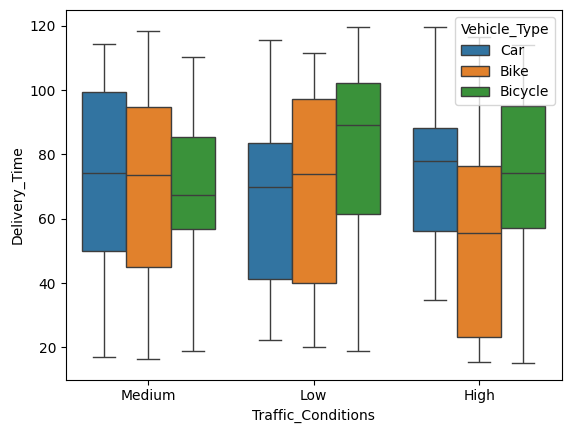

In [114]:
sns.boxplot(x='Traffic_Conditions', y='Delivery_Time', hue='Vehicle_Type', data=df)

In [ ]:
#   There is no clean rule like “Bike is always faster” or “Car dominates in high traffic. There's massive overlap.

In [ ]:
#   Vehicle effectiveness flips depending on traffic regime — there is no monotonic behavior.

In [ ]:
#   Even together, the effect of Traffic_Conditions and Vehicle_Type is conditional and unstable.

In [ ]:
#   BUSINESS INSIGHT: The business does not suffer because deliveries are slow on average but because delivery times are unreliable.

In [ ]:
#   The system’s average delivery time is stable, but high variance and overlapping distributions make delivery outcomes unreliable, indicating that 
#   uncertainty modeling is more critical than mean optimization.

In [118]:

#   numeric correlation

df.select_dtypes(include='number').corr()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000


<Axes: >

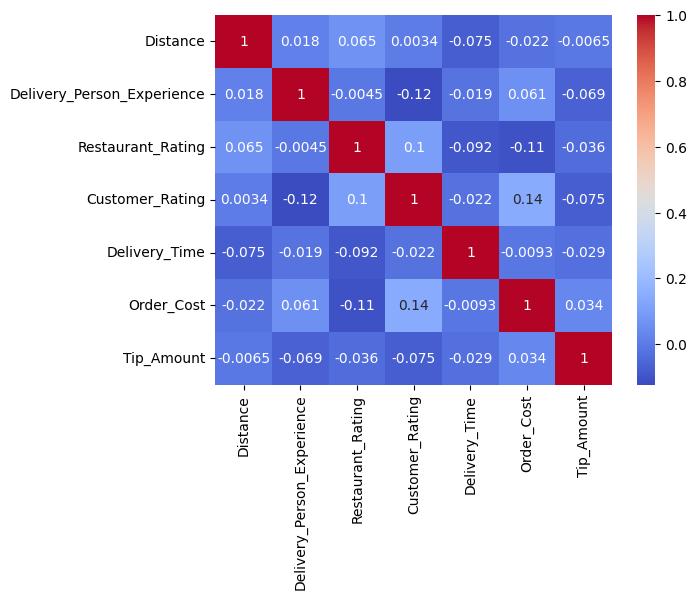

In [119]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
#   Correlation measures marginal linear effects. This problem is driven by conditional and interaction effects.

<Axes: xlabel='Distance', ylabel='Delivery_Time'>

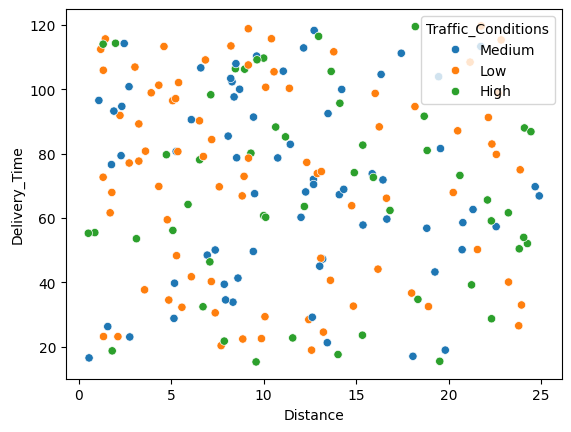

In [121]:
sns.scatterplot(x='Distance', y='Delivery_Time', hue='Traffic_Conditions', data=df)

In [ ]:
#   Distance alone has very weak explanatory power for delivery time.

In [ ]:
#   Traffic is contextual, not deterministic.

In [ ]:
#   The system is heteroskedastic, error variance is not constant.

In [125]:
#   Tail-risk analysis
df['Delivery_Time'].quantile([0.95, 0.99])

0.95    114.0105
0.99    118.8066
Name: Delivery_Time, dtype: float64

In [ ]:
#   The worst 5% take ~60% longer than a typical delivery.

In [131]:
tail = df[df['Delivery_Time'] >= df['Delivery_Time'].quantile(0.95)]
tail.groupby(['Traffic_Conditions', 'Vehicle_Type']).size().sort_values(ascending=False)

Traffic_Conditions  Vehicle_Type
Low                 Bicycle         3
High                Bike            2
Low                 Car             2
High                Car             1
Medium              Bike            1
                    Car             1
dtype: int64

In [130]:
df[df['Delivery_Time'] > df['Delivery_Time'].quantile(0.95)].groupby(['Traffic_Conditions', 'Vehicle_Type']).size()

Traffic_Conditions  Vehicle_Type
High                Bike            2
                    Car             1
Low                 Bicycle         3
                    Car             2
Medium              Bike            1
                    Car             1
dtype: int64

<Axes: ylabel='Delivery_Time'>

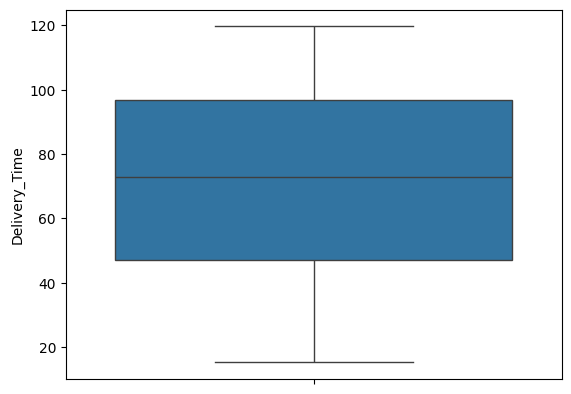

In [124]:
sns.boxplot(y=df['Delivery_Time'])

<Axes: ylabel='Distance'>

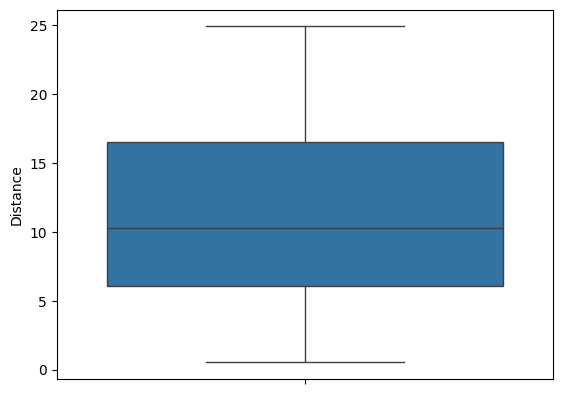

In [127]:
sns.boxplot(df['Distance'])

In [132]:
threshold = df['Delivery_Time'].quantile(0.95)
df['is_outlier'] = df['Delivery_Time'] >= threshold
df['is_outlier'].value_counts(normalize=True)

is_outlier
False    0.95
True     0.05
Name: proportion, dtype: float64

In [ ]:
#   These are not accidental outliers.
#   They are designed tail behavior of the system

In [133]:
df.groupby('is_outlier')['Delivery_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_outlier,,,,,,,,
False,190.0,68.059158,28.591175,15.23,44.3000,70.09,91.7875,114.00
True,10.0,116.775000,2.092968,114.21,115.3975,116.06,118.6650,119.67


In [ ]:
#   Normal deliveries are chaotic and variable
#   Extreme delays are predictable and clustered
#   Once you enter the “bad state”, delivery time becomes almost deterministic

In [134]:
df[df['is_outlier']].groupby(['Traffic_Conditions', 'Vehicle_Type']).size().sort_values(ascending=False)

Traffic_Conditions  Vehicle_Type
Low                 Bicycle         3
High                Bike            2
Low                 Car             2
High                Car             1
Medium              Bike            1
                    Car             1
dtype: int64

In [24]:
prof = ProfileReport(df)
prof.to_file(output_file = "profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 796.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]